## A confidence interval is a statistical range or interval calculated from sample data that is likely to contain the true value of a population parameter with a certain level of confidence. It provides a measure of the uncertainty or variability associated with estimating population parameters based on sample data.

#### In simple terms

Imagine you want to figure out something about a whole bunch of people, like their average height in a city. But it's impossible to measure every single person, so you take a sample, maybe a hundred people. Now, based on this sample, you calculate an average height. 

But here's the catch: your sample might not perfectly represent everyone in the city. So, the average height you calculated might not be exactly the same as if you measured every single person. That's where a confidence interval comes in.

The confidence interval gives you a range, like saying, "I'm pretty sure the true average height of people in this city is somewhere between 5 feet 6 inches and 5 feet 10 inches." The "confidence level" tells you how sure you are that this range contains the true average height. For example, if you have a 95% confidence level, it means you're 95% sure the true average height falls within that range.

So, instead of giving you just one number, the confidence interval tells you a range that the true value is likely to be in, based on your sample. It's like a safety net for estimating population characteristics from smaller samples.

## Import necessary libraries


In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Function to calculate confidence interval


In [1]:
def calculate_confidence_interval(data, confidence=0.95):
    """
    Calculate the confidence interval for a given dataset.

    Parameters:
        data (array-like): The data for which the confidence interval is to be calculated.
        confidence (float): The confidence level (between 0 and 1), default is 0.95.

    Returns:
        tuple: Lower bound and upper bound of the confidence interval.
    """
    # Calculate mean and standard error
    mean = np.mean(data)
    stderr = stats.sem(data)
    
    # Calculate margin of error
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    
    # Calculate confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    return lower_bound, upper_bound

# Example usage
# Generate sample data (heights in inches)
np.random.seed(0)  # for reproducibility
sample_data = np.random.normal(loc=66, scale=3, size=100)  # Mean height: 66 inches, Standard deviation: 3 inches

# Calculate confidence interval
confidence_interval = calculate_confidence_interval(sample_data)

# Print the confidence interval
print("Confidence Interval (95%):", confidence_interval)


Confidence Interval (95%): (65.5764444629898, 66.78240363021712)


## What Does Output Mean

The output `Confidence Interval (95%): (65.5764444629898, 66.78240363021712)` represents the confidence interval for the average height of the population, based on the sample data.

Here's what each part of the output means:

- **Confidence Interval (95%)**: This indicates that the confidence interval was calculated with a confidence level of 95%. In other words, we are 95% confident that the true population mean falls within the calculated interval.

- **(65.5764444629898, 66.78240363021712)**: This is the range of values that is estimated to contain the true population mean height with 95% confidence. The first number (65.5764444629898) is the lower bound of the interval, and the second number (66.78240363021712) is the upper bound of the interval. So, we can interpret this result as follows: "We are 95% confident that the true average height of the population lies between 65.58 inches and 66.78 inches."

This means that if we were to repeat the process of taking samples and calculating confidence intervals many times, about 95% of the intervals we calculate would contain the true average height of the population.

## Visualization 

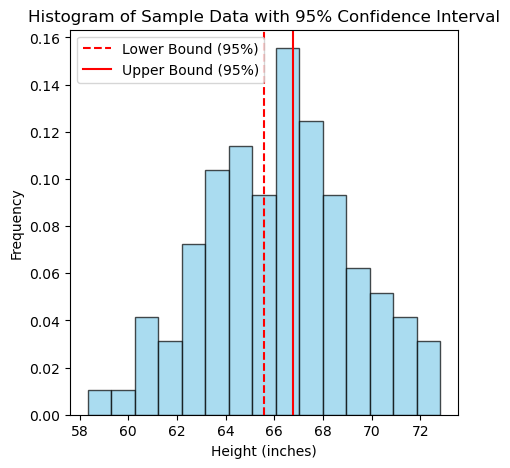

In [9]:
# Plot histogram of sample data
plt.figure(figsize=(5, 5))
plt.hist(sample_data, bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Plot confidence interval
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower Bound (95%)')
plt.axvline(x=confidence_interval[1], color='red', linestyle='-', label='Upper Bound (95%)')

# Add labels and title
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data with 95% Confidence Interval')
plt.legend()

# Show plot
plt.show()
